# Assignment 3: PCA, Kmeans and Kernel Methods

Jingran Lyu a1832252

In [2]:
# Import libraries
import numpy as np
import pandas as pd

In [3]:
# Data set
file = pd.read_csv('/Users/shawnl/Downloads/mnist.csv', header=None)
x = file.iloc[:, 1:]
y = file.iloc[:, 0]
x.head()
# y.describe()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


PCA

In [4]:
# PCA
def reduce_dimension(data, k):
    # Get mean of every column
    x_mean = np.array(np.mean(data, axis=0))
    tem = np.array(data)
    m, n = tem.shape
    # Origin data minus mean
    tem = tem - np.tile(x_mean, (m, 1))

    # Calculate covariance matrix
    cov_matrix = np.cov(tem, rowvar=False)
    cov_eig = np.linalg.eig(cov_matrix)

    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = cov_eig[0], cov_eig[1]
    index = eigenvalues.argsort()[::-1][:k]

    trans_matrix = eigenvectors[:,index]

    # Transform origin data to new dimension
    final_matrix = np.dot(tem, trans_matrix)

    # Get mean of transformed matrix
    final_means = np.array(np.mean(final_matrix, axis=0))

    final_matrix = final_matrix - np.tile(final_means, (m, 1))

    new_cov_matrix = np.cov(final_matrix, rowvar=False)

    return new_cov_matrix

# For test case
# xxx = pd.DataFrame([ [2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1, 3.0], [2.3, 2.7], [2, 1.6], [1, 1.1], [1.5, 1.6], [1.1, 0.9]])
reduce_dimension(x, 10)

array([[ 5.30558677e+00+0.j,  5.05694651e-15+0.j,  1.05296298e-15+0.j,
         5.64975638e-16+0.j,  1.13705789e-16+0.j,  8.39172409e-16+0.j,
         1.37394495e-16+0.j, -3.41117366e-16+0.j, -1.09915596e-15+0.j,
         2.75973425e-16+0.j],
       [ 5.05694651e-15+0.j,  3.87701635e+00+0.j, -1.01861436e-15+0.j,
        -2.33096867e-15+0.j, -1.00677000e-16+0.j, -1.76169945e-15+0.j,
         3.12690919e-16+0.j,  1.39171148e-17+0.j,  2.72420119e-17+0.j,
         3.63621637e-16+0.j],
       [ 1.05296298e-15+0.j, -1.01861436e-15+0.j,  3.28704664e+00+0.j,
         3.50267129e-15+0.j, -1.39763365e-16+0.j, -1.69966465e-15+0.j,
         1.06599177e-17+0.j,  2.46362542e-16+0.j, -6.26566273e-16+0.j,
        -3.51185066e-16+0.j],
       [ 5.64975638e-16+0.j, -2.33096867e-15+0.j,  3.50267129e-15+0.j,
         2.91254096e+00+0.j, -9.11422962e-16+0.j, -3.51120292e-15+0.j,
         9.29781710e-17+0.j,  1.44693577e-15+0.j,  1.68782030e-16+0.j,
         2.03130654e-16+0.j],
       [ 1.13705789e-16+0.j,

k-means clustering

In [5]:
def calc_dis(dataset, centroids, k):
    cla_list=[]
    for data in dataset:
        # Calculate distance of one sample to all centroids
        # Euclidean metric
        diff = np.tile(data, (k, 1)) - centroids
        # distance = np.linalg.norm(diff,axis=1)
        squared_diff = diff ** 2
        squared_dist = np.sum(squared_diff, axis=1)
        distance = squared_dist ** 0.5
        cla_list.append(distance)
    cla_list = np.array(cla_list)
    return cla_list

def classify(dataset, centroids, k):
    # Calculate distance between samples to centroids
    cla_list = calc_dis(dataset, centroids, k)

    # Calculate new centroids
    # Get the shortest distance of every sample to k centroids
    min_dist_indices = np.argmin(cla_list, axis=1)
    # Get new cluster and the mean will be the centroid of new cluster
    new_centroids = pd.DataFrame(dataset).groupby(min_dist_indices).mean()
    new_centroids = new_centroids.values

    # Calculate difference of old and new centroids
    changed = new_centroids - centroids

    return changed, new_centroids

def k_means_clustering(dataset, k):
    m = dataset.shape[0]
    # Random pick k datas as centroids
    centroids = np.array(dataset.take(np.random.choice(m,k,replace=False),axis=0).reset_index(drop=True))
    tem_data = np.array(dataset)

    # First time calculate new centroids
    changed, new_centroids = classify(tem_data, centroids, k)

    # Iteratively execute until centroids not change
    while np.any(changed != 0):
        changed, new_centroids = classify(tem_data, new_centroids, k)

    # Get samples of different cluster
    centroids = sorted(new_centroids.tolist())

    cluster = []
    cla_list = calc_dis(tem_data, centroids, k)
    min_dist_indices = np.argmin(cla_list, axis=1)
    for i in range(k):
        cluster.append([])
    for i, j in enumerate(min_dist_indices):
        cluster[j].append(tem_data[i])

    return new_centroids, cluster

# _centroids, _cluster = k_means_clustering(x, 10)
# print('Centroids: %s' % _centroids)
# # print('Cluster: %s' % _cluster)

plot the loss curve

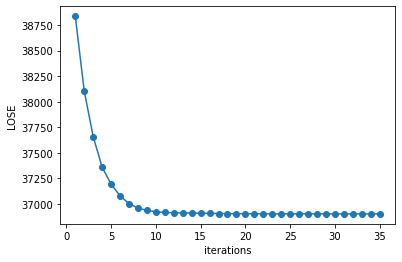

In [6]:
import matplotlib.pyplot as plt

def plot_loss_curve(dataset, k):
    m = dataset.shape[0]
    # Random pick k datas as centroids
    centroids = np.array(dataset.take(np.random.choice(m,k,replace=False),axis=0).reset_index(drop=True))
    tem_data = np.array(dataset)
    loss = []

    num = 1  # Iterations time
    changed, new_centroids = classify(tem_data, centroids, k)

    # Calculate distance between samples to centroids
    cla_list = calc_dis(tem_data, new_centroids, k)

    # Add all shortest distances
    min_dist_indices = np.min(cla_list, axis=1)
    loss.append(np.sum(min_dist_indices))
    while np.any(changed != 0):
        num += 1
        changed, new_centroids = classify(tem_data, new_centroids, k)
        cla_list = calc_dis(tem_data, new_centroids, k)
        # Add all shortest distances
        min_dist_indices = np.min(cla_list, axis=1)
        loss.append(np.sum(min_dist_indices))

    X = range(1,num+1)
    plt.xlabel('iterations')
    plt.ylabel('LOSE')
    plt.plot(X,loss,'o-')
    plt.show()

plot_loss_curve(x, 10)


choose the best k in k-means

In [7]:
# Check loss function
def loss_dis(tem_data, centroids, k):
    cla_list = calc_dis(tem_data, centroids, k)
    min_dist_indices = np.min(cla_list, axis=1) ** 2
    distance = np.sum(min_dist_indices)

    return distance

# For test
# def plot_loss_function_curve(data):
#     tem_data = np.array(data)
#     sse = []
#     for k in range(1,15):
#         result_centroids, result_cluster = k_means_clustering(data, k)
#         sse.append(loss_dis(tem_data, result_centroids, k))
#
#     X = range(1,15)
#     plt.xlabel('k')
#     plt.ylabel('SSE')
#     plt.plot(X,sse,'o-')
#     plt.show()
#
# plot_loss_function_curve(x)

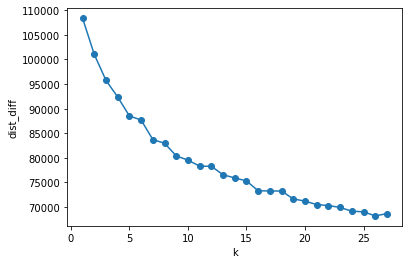

27

In [11]:
def best_k(dataset, size):
    # Split data to train and valid
    train, valid = dataset.iloc[:size, :], np.array(dataset.iloc[size:, :])
    k=1

    # Calculate centroids and cluster
    result_centroids, result_cluster = k_means_clustering(train, k)
    # Calculate loss function
    distance_cur = loss_dis(valid, result_centroids, k)

    dist_diff = [distance_cur]  # Distance between previous loss and current loss
    for k in range(2,100):

        distance_bef = distance_cur
        # Calculate centroids and cluster
        result_centroids, result_cluster = k_means_clustering(train, k)
        distance_cur = loss_dis(valid, result_centroids, k)

        dist_diff.append(distance_cur)
        # When loss difference is current smallest
        if distance_bef < distance_cur:
            break

    X = range(1,k+1)
    plt.xlabel('k')
    plt.ylabel('dist_diff')
    plt.plot(X,dist_diff,'o-')
    plt.show()
    return k-1

best_k(x, 4000)

RBF-kernel

In [528]:
# RBF-kernel k means
def gaussian_kernel(dataset, cluster):
    tem_data = np.array(dataset)
    m = dataset.shape[0]
    clu_dis = []
    total_dis = 0

    # For every sample calculate the distance between it to all the clusters' points
    for data in tem_data:
        distances = []
        # In every cluster, calculate distance
        for i in cluster:
            k = len(i)
            tem_diff = np.tile(data, (k, 1)) - np.array(i)
            diff = np.linalg.norm(tem_diff,axis=1) ** 2
            sum_diff = np.sum(diff)
            # Get total distance
            total_dis += sum_diff
            distances.append(sum_diff)
        clu_dis.append(distances)
    for c in range(len(clu_dis)):
        clu_dis[c] = np.exp((-1 * m * m * np.array(clu_dis[c]) / total_dis))

    return clu_dis

def assign(dataset, f_x, g_c, k, clu_list):
    m = dataset.shape[0]
    new_clu_list = [0 for i in range(m)]
    new_cluster = [[] for i in range(k)]

    res = f_x + np.tile(g_c, (m, 1))
    for i in range(len(res)):
        new_clu_list[i] = np.argmin(res[i])
    # print(new_clu_list)

    # Prevent there is cluster empty
    index = pd.DataFrame([new_clu_list.count(ind)] for ind in range(k))

    max_num = max(index.values)[0]
    min_num = min(index.values)[0]
    if max_num == m:
        max_ind = index[index.values==max_num].index.tolist()[0]
        kk = 0
        ind = 0
        while kk != k:
            if new_clu_list[ind] == max_ind:
                new_clu_list[ind] = kk
                kk+=1
            ind+=1
        new_clu_list = np.random.permutation(new_clu_list)

    elif min_num == 0:
        min_ind = index[index.values==min_num].index.tolist()
        max_ind = index[index.values==max_num].index.tolist()
        if len(min_ind) == 1:
            ind = 0
            while True:
                if new_clu_list[ind] == max_ind[0]:
                    new_clu_list[ind] = min_ind[0]
                    break
                ind+=1
        else:
            if len(min_ind) < max_num:
                ind = 0
                while len(min_ind) != 0:
                    if new_clu_list[ind] == max_ind[0]:
                        new_clu_list[ind] = min_ind[0]
                        min_ind.pop(0)
                    ind+=1
        new_clu_list = np.random.permutation(new_clu_list)


    # Get new cluster
    data_group = dataset.groupby(new_clu_list)
    for i,j in data_group:
        new_cluster[i] = j.values.tolist()

    changed = np.array(new_clu_list) - np.array(clu_list)

    return changed, new_cluster, new_clu_list

def kernel_k_means(dataset, k):
    train = dataset.iloc[:500, :]
    m = train.shape[0]
    # Random split to k clusters
    shuffled = train.sample(frac=1)
    tem_data = np.array_split(shuffled, k)
    clu_list = [0 for i in range(m)]
    cluster = [[] for i in range(k)]

    # Get list to show the cluster index of different sample
    for i, j in enumerate(tem_data):
        cluster[i] = j.values.tolist()
        for ind in j.index.values:
            clu_list[ind] = i

    changed = clu_list
    # Iteratively execute until cluster index of different sample not change
    while np.any(changed != 0):
        # function = k<xi, xi> - 2 acc_j rj k<xj, xi> + acc_i acc_j ri rj k<xj, xi>
        # k<xi, xi> should be 0
        # Second section k<xj, xi>
        kernel = gaussian_kernel(train, cluster)
        # rj * -2
        f_x_1 = -2 / np.array([len(clu) for clu in cluster])
        # Second section
        f_x = []
        for kl in kernel:
            f_x.append(np.multiply(kl, f_x_1))
        f_x = np.array(f_x, dtype=object)

        # Third section
        g_c = (1 / np.array([len(clu) for clu in cluster]) ** 2)

        # Get cluster changes and new clusters
        changed, cluster, clu_list = assign(train, f_x, g_c ,k, clu_list)
        print(1)


    print(cluster)

    # For test
    # kernel_colors = ['red','yellow','green']
    # new_centroids = pd.DataFrame(dataset).groupby(clu_list).mean() #DataFramte(dataSet)
    # new_centroids = new_centroids.values
    # plt.scatter(new_centroids[0][0],new_centroids[0][1],color = kernel_colors[0],s=200)
    # plt.scatter(new_centroids[1][0],new_centroids[1][1],color = kernel_colors[1],s=200)
    # plt.scatter(new_centroids[2][0],new_centroids[2][1],color = kernel_colors[2],s=200)
    #
    # for i in range(len(cluster)):
    #     for j in cluster[i] :
    #         plt.scatter(j[0],j[1],color = kernel_colors[i],alpha= 0.5,s=50)



kernel_k_means(x, 5)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


KeyboardInterrupt: 